# e01 - Basics
Это – тетрадка Jupyter. Вывод в клетках тетрадки, когда вы ее открываете, если он есть – это кэшированный вывод. Чтобы выполнить клетку, поместите в нее курсор и нажмите `Shift+Enter`. Клетки передаются интерпретатору в том порядке, в котором вы это делаете, не обязательно сверху вниз

## Читаем jpg, смотрим на размер и тип объекта

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('myimage.jpg')
img.shape

(800, 600, 3)

In [3]:
type(img)

numpy.ndarray

Итак, изображение зачитывается прямо в numpy массив как набор яркостей по трем каналам, поэтому массив трехмерный: (вертикаль, горизонталь, цветовой канал). Посмотрим на изображение.
## BGR vs RGB

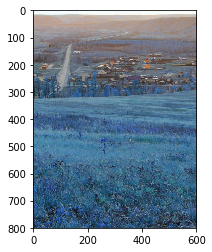

In [4]:
plt.imshow(img)

Проблема с цветом на картинке выше – в том, что matpoltlib ожидает порядок цветов RGB (красный, зеленый, синий), а OpenCV использует BGR. Можно вручную перетасовать цвета в тройках, взяв индексы в обратном порядке по последней координате:

In [ ]:
plt.imshow(img[:,:,::-1])

Можно использовать явно функции преобразования цвета в OpenCV:

In [ ]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

## Сохранение файлов

In [ ]:
img_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # преобразуем изображение в ч/б
cv2.imwrite('myimage_bw.jpg', img_bw)

##  Чтение grayscale файлов

In [ ]:
img3 = cv2.imread('myimage_bw.jpg')
img3.shape

По умолчанию изображение зачитывается как трехканальное. Даже если в файле оно в градациях серого. Если изображение хочется получить в одом канале яркости, нужно указать вторым аргументом режим:

In [ ]:
im3 = cv2.imread('myimage_bw.jpg', cv2.IMREAD_GRAYSCALE)
im3.shape

##  Показ grayscale файлов
Для показа через matplotlib нужно дать функции `imshow()` знать, что изображение ч/б, при помощи аргумента `cmap`:

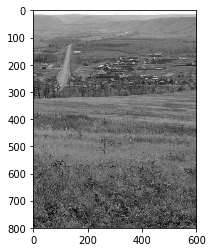

In [15]:
plt.imshow(im3, cmap='gray')

## Чтение видеофайлов

Зачитаем и отобразим первые 15 кадров видеофайла `myvideo.mp4` (by ["What's In John's Freezer?"](https://www.youtube.com/watch?v=uNFURmUo8b0)).

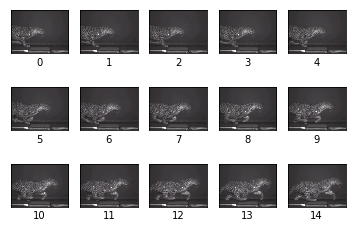

In [16]:
cap = cv2.VideoCapture('myvideo.mp4') 
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    ret, frame = cap.read()
    axi.imshow(frame)
    axi.set(xticks=[], yticks=[],
        xlabel=str(i))

## Показ в окне cv2
OpenCV имеет собственную функцию `cv2.imshow("<заголовок окна>", <пиксельные данные>)` для показа изображений в окнах с минималистичным интерфейсом. При этом такое окно работает в основном потоке вашего Питон-интерпретатора, который получает ввод и т.д., а не в отдельном окне с собственным управляющим потоком, как в maptplotlib. Поэтому обычно сразу после показа окна пишется цикл, который обрабатывает сообщения с клавиатуры и т.п., а затем закрывает окно после завершения работы. Типичный такой цикл показан ниже.

## Захват видео с камеры
Если вместо названия видеофайла указать число, это будет воспринято как номер веб-камеры (например, на ноутбуках `0` — код встроенной камеры). Код, приведенный ниже, использует интерфейсные окна cv2. Поэтому он записан в ячейке, которую нельзя запустить: его надо запускать не из тетрадки, а из командной строки (это файл `video_capture.py`). Функция `waitKey` ожидает нажатия любой клавиши заданное число миллисекунд и возвращает код нажатой клавиши. Мы проверяем его младший байт (`& 0xFF`). Если клавиша — `q`, цикл прерывается, веб-камера освобождается, окна закрываются.

    import cv2
    cap = cv2.VideoCapture(0)

    while(True):
        # Получить очередной кадр
        ret, frame = cap.read()

        # Преобразовать в ч/б
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)    

        # Нарисовать подсказку о выходе
        cv2.putText(gray, "Press `q` to quit", (20,20), cv2.FONT_HERSHEY_SIMPLEX, 1, 0)

        # Показать
        cv2.imshow('Video Capture Test',gray)

        # Если нажата q, выйти, иначе начать снова
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Закрыть камеру и окна 
    cap.release()
    cv2.destroyAllWindows()


## Задание 0 (в классе)
Напишите, пользуясь функциями `cv2.VideoCapture`, `.read`, `cv2.imwrite`, программу, которая будет записывать каждый 10-й кадр с камеры, в папку `../faces` в виде черно-белого изображения в файлы формата JPEG с последовательной нумерацией

## Задание 1 (дома)
Выделить лица из полученных изображений, подробнее см. [презентацию](https://kit-classes.github.io/imglearn/e01-opencv-basics).